In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
import gym
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
import json
import numpy as np

Using TensorFlow backend.


### Agent and Environment Description

* observation:  
    (Cart Position ,  Cart Velocity ,  Pole Angle ,  Pole Velocity At Tip)
 
* Actions:  
    0 Push cart to the left; 1 Push cart to the right

* Reward:  
    Reward is for every step taken ,  including the termination step

* Starting State:  
    All observations are assigned a uniform random value between +-0.05

* Episode Termination:  
    Pole Angle is more than ±12°
    Cart Position is more than ± 2.4 
    (center of the cart reaches the edge of the display)
    Episode length is greater than 200

* reference:  
    http:  //neuro-educator.com/rl1/


In [2]:
env = gym.make('CartPole-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
model = Sequential()
# input: (n x 4) ( Cart Position, Cart Vel, Pole Angle, Pole Vel)
model.add(Flatten(input_shape=(1, env.observation_space.shape[0])))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))

# output: (n x 3) (left, no, right)
model.add(Dense(env.action_space.n))
model.add(Activation('linear'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
__________

In [5]:
# memory replay
memory = SequentialMemory(limit=50000, window_length=1)

# epsilon greedy algorithm
policy = EpsGreedyQPolicy(eps=0.001)

dqn = DQNAgent(model=model, nb_actions=env.action_space.n, gamma=0.99, memory=memory,
              nb_steps_warmup=10, target_model_update=1e-2, policy=policy)

In [42]:
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=100000, visualize=False, verbose=2)

Training for 100000 steps ...
   200/100000: episode: 1, duration: 1.110s, episode steps: 200, steps per second: 180, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.091 [-0.553, 0.606], loss: 100.118059, mean_absolute_error: 48.386495, mean_q: 97.471889
   400/100000: episode: 2, duration: 0.410s, episode steps: 200, steps per second: 487, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.166 [-0.660, 0.952], loss: 21.063047, mean_absolute_error: 49.649826, mean_q: 100.768593
   600/100000: episode: 3, duration: 0.414s, episode steps: 200, steps per second: 483, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.176 [-0.730, 1.148], loss: 21.213579, mean_absolute_error: 51.815792, mean_q: 105.447777
   800/100000: episode: 4, duration: 0.402s, episode steps: 200, steps per second: 498, episod

  5424/100000: episode: 29, duration: 0.411s, episode steps: 200, steps per second: 487, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.131 [-0.515, 0.698], loss: 55.919865, mean_absolute_error: 69.482513, mean_q: 139.108704
  5624/100000: episode: 30, duration: 0.400s, episode steps: 200, steps per second: 500, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.148 [-0.548, 0.747], loss: 39.881207, mean_absolute_error: 69.495979, mean_q: 139.680725
  5824/100000: episode: 31, duration: 0.402s, episode steps: 200, steps per second: 498, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.170 [-0.629, 0.945], loss: 123.447441, mean_absolute_error: 71.349129, mean_q: 143.637207
  6024/100000: episode: 32, duration: 0.406s, episode steps: 200, steps per second: 493, episode reward: 200.000, mean r

 11024/100000: episode: 57, duration: 0.435s, episode steps: 200, steps per second: 460, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.423 [-0.563, 2.022], loss: 84.045731, mean_absolute_error: 104.371895, mean_q: 212.004349
 11169/100000: episode: 58, duration: 0.289s, episode steps: 145, steps per second: 502, episode reward: 145.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.510 [0.000, 1.000], mean observation: 0.493 [-0.620, 2.410], loss: 106.162613, mean_absolute_error: 106.787170, mean_q: 217.337601
 11278/100000: episode: 59, duration: 0.225s, episode steps: 109, steps per second: 484, episode reward: 109.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.523 [0.000, 1.000], mean observation: 0.511 [-0.651, 2.406], loss: 106.149384, mean_absolute_error: 109.248268, mean_q: 222.708130
 11420/100000: episode: 60, duration: 0.290s, episode steps: 142, steps per second: 489, episode reward: 142.000, me

 12699/100000: episode: 86, duration: 0.203s, episode steps: 101, steps per second: 498, episode reward: 101.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.554 [0.000, 1.000], mean observation: 0.493 [-0.692, 2.405], loss: 526.536743, mean_absolute_error: 134.398270, mean_q: 270.881439
 12812/100000: episode: 87, duration: 0.242s, episode steps: 113, steps per second: 467, episode reward: 113.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.531 [0.000, 1.000], mean observation: 0.479 [-0.811, 2.414], loss: 237.040482, mean_absolute_error: 135.282913, mean_q: 273.646118
 12940/100000: episode: 88, duration: 0.257s, episode steps: 128, steps per second: 499, episode reward: 128.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.516 [0.000, 1.000], mean observation: 0.461 [-0.730, 2.413], loss: 266.281799, mean_absolute_error: 136.656311, mean_q: 275.865540
 13057/100000: episode: 89, duration: 0.232s, episode steps: 117, steps per second: 504, episode reward: 117.000, m

 15946/100000: episode: 114, duration: 0.173s, episode steps: 81, steps per second: 468, episode reward: 81.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.568 [0.000, 1.000], mean observation: 0.332 [-0.392, 2.005], loss: 245.660477, mean_absolute_error: 142.992950, mean_q: 285.906952
 16067/100000: episode: 115, duration: 0.241s, episode steps: 121, steps per second: 503, episode reward: 121.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.570 [0.000, 1.000], mean observation: 0.458 [-0.620, 3.079], loss: 317.249664, mean_absolute_error: 140.700485, mean_q: 280.654755
 16152/100000: episode: 116, duration: 0.182s, episode steps: 85, steps per second: 467, episode reward: 85.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.565 [0.000, 1.000], mean observation: 0.330 [-0.580, 2.010], loss: 200.886993, mean_absolute_error: 140.842178, mean_q: 282.555115
 16266/100000: episode: 117, duration: 0.228s, episode steps: 114, steps per second: 501, episode reward: 114.000, m

 19252/100000: episode: 142, duration: 0.302s, episode steps: 148, steps per second: 491, episode reward: 148.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.534 [0.000, 1.000], mean observation: 0.395 [-0.587, 2.411], loss: 180.475082, mean_absolute_error: 129.391266, mean_q: 258.329803
 19399/100000: episode: 143, duration: 0.294s, episode steps: 147, steps per second: 500, episode reward: 147.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.531 [0.000, 1.000], mean observation: 0.389 [-0.808, 2.416], loss: 211.366501, mean_absolute_error: 126.114746, mean_q: 251.143066
 19554/100000: episode: 144, duration: 0.319s, episode steps: 155, steps per second: 487, episode reward: 155.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.535 [0.000, 1.000], mean observation: 0.400 [-0.516, 2.402], loss: 177.039169, mean_absolute_error: 127.169289, mean_q: 253.067093
 19720/100000: episode: 145, duration: 0.336s, episode steps: 166, steps per second: 495, episode reward: 166.00

 24383/100000: episode: 170, duration: 0.394s, episode steps: 200, steps per second: 508, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.009 [-0.347, 0.321], loss: 83.257919, mean_absolute_error: 93.845352, mean_q: 188.393600
 24583/100000: episode: 171, duration: 0.415s, episode steps: 200, steps per second: 482, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.009 [-0.570, 0.434], loss: 69.706512, mean_absolute_error: 94.177422, mean_q: 189.445038
 24783/100000: episode: 172, duration: 0.412s, episode steps: 200, steps per second: 485, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.014 [-0.406, 0.570], loss: 85.692734, mean_absolute_error: 95.157257, mean_q: 191.635941
 24983/100000: episode: 173, duration: 0.392s, episode steps: 200, steps per second: 510, episode reward: 200.000, 

 29983/100000: episode: 198, duration: 0.425s, episode steps: 200, steps per second: 471, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.002 [-0.581, 0.392], loss: 270.694366, mean_absolute_error: 138.170029, mean_q: 276.567841
 30183/100000: episode: 199, duration: 0.402s, episode steps: 200, steps per second: 498, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.019 [-0.556, 0.369], loss: 252.150620, mean_absolute_error: 140.123413, mean_q: 281.713165
 30383/100000: episode: 200, duration: 0.396s, episode steps: 200, steps per second: 505, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.017 [-0.397, 0.457], loss: 205.858093, mean_absolute_error: 141.469421, mean_q: 284.775085
 30583/100000: episode: 201, duration: 0.421s, episode steps: 200, steps per second: 475, episode reward: 200.

 35583/100000: episode: 226, duration: 0.391s, episode steps: 200, steps per second: 511, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.039 [-0.538, 0.575], loss: 428.849182, mean_absolute_error: 186.332932, mean_q: 373.042023
 35783/100000: episode: 227, duration: 0.435s, episode steps: 200, steps per second: 460, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.043 [-0.462, 0.394], loss: 624.339355, mean_absolute_error: 186.849762, mean_q: 372.912018
 35983/100000: episode: 228, duration: 0.404s, episode steps: 200, steps per second: 495, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.069 [-0.755, 0.748], loss: 639.762085, mean_absolute_error: 188.249237, mean_q: 376.586060
 36183/100000: episode: 229, duration: 0.390s, episode steps: 200, steps per second: 513, episode reward: 200.00

 40994/100000: episode: 254, duration: 0.391s, episode steps: 200, steps per second: 511, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: 0.109 [-0.958, 1.153], loss: 570.864685, mean_absolute_error: 208.498444, mean_q: 413.207153
 41194/100000: episode: 255, duration: 0.464s, episode steps: 200, steps per second: 431, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.058 [-0.447, 0.427], loss: 537.425842, mean_absolute_error: 206.057953, mean_q: 408.510773
 41394/100000: episode: 256, duration: 0.396s, episode steps: 200, steps per second: 505, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.077 [-0.556, 0.622], loss: 360.687347, mean_absolute_error: 202.882462, mean_q: 402.758392
 41594/100000: episode: 257, duration: 0.393s, episode steps: 200, steps per second: 508, episode reward: 200.00

 46161/100000: episode: 282, duration: 0.413s, episode steps: 200, steps per second: 484, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.018 [-0.615, 0.854], loss: 289.363983, mean_absolute_error: 155.255219, mean_q: 304.276398
 46361/100000: episode: 283, duration: 0.395s, episode steps: 200, steps per second: 506, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.051 [-0.489, 0.568], loss: 211.572815, mean_absolute_error: 153.466019, mean_q: 301.440613
 46561/100000: episode: 284, duration: 0.437s, episode steps: 200, steps per second: 457, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.001 [-0.305, 0.348], loss: 222.493835, mean_absolute_error: 152.833481, mean_q: 300.004425
 46761/100000: episode: 285, duration: 0.421s, episode steps: 200, steps per second: 475, episode reward: 200.00

 49225/100000: episode: 311, duration: 0.192s, episode steps: 92, steps per second: 479, episode reward: 92.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.543 [0.000, 1.000], mean observation: 0.265 [-1.024, 1.832], loss: 194.170563, mean_absolute_error: 140.938217, mean_q: 278.399078
 49336/100000: episode: 312, duration: 0.226s, episode steps: 111, steps per second: 491, episode reward: 111.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.541 [0.000, 1.000], mean observation: 0.230 [-2.030, 1.868], loss: 210.655319, mean_absolute_error: 141.475494, mean_q: 278.596649
 49428/100000: episode: 313, duration: 0.232s, episode steps: 92, steps per second: 396, episode reward: 92.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.554 [0.000, 1.000], mean observation: 0.275 [-1.855, 1.877], loss: 241.721558, mean_absolute_error: 140.599457, mean_q: 276.848724
 49524/100000: episode: 314, duration: 0.188s, episode steps: 96, steps per second: 510, episode reward: 96.000, mea

 51647/100000: episode: 339, duration: 0.200s, episode steps: 94, steps per second: 470, episode reward: 94.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.543 [0.000, 1.000], mean observation: 0.168 [-1.787, 1.726], loss: 188.514893, mean_absolute_error: 132.617401, mean_q: 261.957916
 51719/100000: episode: 340, duration: 0.152s, episode steps: 72, steps per second: 473, episode reward: 72.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.556 [0.000, 1.000], mean observation: 0.206 [-1.554, 1.734], loss: 263.790649, mean_absolute_error: 135.734314, mean_q: 267.754944
 51818/100000: episode: 341, duration: 0.213s, episode steps: 99, steps per second: 465, episode reward: 99.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.535 [0.000, 1.000], mean observation: 0.191 [-1.131, 1.448], loss: 211.947754, mean_absolute_error: 133.403976, mean_q: 263.616272
 51898/100000: episode: 342, duration: 0.157s, episode steps: 80, steps per second: 508, episode reward: 80.000, mean 

 55502/100000: episode: 367, duration: 0.370s, episode steps: 175, steps per second: 472, episode reward: 175.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.520 [0.000, 1.000], mean observation: 0.106 [-2.594, 1.382], loss: 146.019272, mean_absolute_error: 108.665581, mean_q: 214.362610
 55510/100000: episode: 368, duration: 0.020s, episode steps: 8, steps per second: 406, episode reward: 8.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.171 [-2.570, 1.546], loss: 23.934536, mean_absolute_error: 103.507645, mean_q: 204.954620
 55637/100000: episode: 369, duration: 0.264s, episode steps: 127, steps per second: 480, episode reward: 127.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.535 [0.000, 1.000], mean observation: 0.073 [-2.885, 1.760], loss: 86.422295, mean_absolute_error: 107.259239, mean_q: 212.013077
 55647/100000: episode: 370, duration: 0.022s, episode steps: 10, steps per second: 460, episode reward: 10.000, mean

 58161/100000: episode: 395, duration: 0.402s, episode steps: 200, steps per second: 497, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: 0.292 [-0.894, 1.756], loss: 68.719475, mean_absolute_error: 88.234932, mean_q: 174.608170
 58355/100000: episode: 396, duration: 0.406s, episode steps: 194, steps per second: 478, episode reward: 194.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.299 [-1.163, 1.775], loss: 57.908802, mean_absolute_error: 87.190239, mean_q: 172.750244
 58555/100000: episode: 397, duration: 0.410s, episode steps: 200, steps per second: 488, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: 0.244 [-0.701, 1.494], loss: 80.359276, mean_absolute_error: 86.129593, mean_q: 170.203873
 58751/100000: episode: 398, duration: 0.392s, episode steps: 196, steps per second: 501, episode reward: 196.000, mea

 61972/100000: episode: 423, duration: 0.038s, episode steps: 16, steps per second: 422, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.625 [0.000, 1.000], mean observation: -0.088 [-1.594, 0.835], loss: 33.672386, mean_absolute_error: 73.415047, mean_q: 146.113159
 61998/100000: episode: 424, duration: 0.058s, episode steps: 26, steps per second: 445, episode reward: 26.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.577 [0.000, 1.000], mean observation: -0.045 [-1.557, 0.794], loss: 55.197586, mean_absolute_error: 74.466805, mean_q: 147.677475
 62012/100000: episode: 425, duration: 0.029s, episode steps: 14, steps per second: 480, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.643 [0.000, 1.000], mean observation: -0.095 [-1.520, 0.759], loss: 38.383869, mean_absolute_error: 75.015503, mean_q: 148.301788
 62212/100000: episode: 426, duration: 0.421s, episode steps: 200, steps per second: 475, episode reward: 200.000, mean r

 65937/100000: episode: 451, duration: 0.468s, episode steps: 200, steps per second: 427, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.082 [-0.594, 0.404], loss: 65.475792, mean_absolute_error: 67.414200, mean_q: 132.506882
 66137/100000: episode: 452, duration: 0.407s, episode steps: 200, steps per second: 491, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.105 [-0.501, 0.414], loss: 43.612949, mean_absolute_error: 67.303635, mean_q: 133.075287
 66337/100000: episode: 453, duration: 0.401s, episode steps: 200, steps per second: 499, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.098 [-0.573, 0.444], loss: 49.952007, mean_absolute_error: 68.210281, mean_q: 134.998047
 66537/100000: episode: 454, duration: 0.426s, episode steps: 200, steps per second: 470, episode reward: 200.000, 

 71500/100000: episode: 479, duration: 0.400s, episode steps: 200, steps per second: 500, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.172 [-0.997, 0.364], loss: 74.933990, mean_absolute_error: 94.316208, mean_q: 189.799332
 71700/100000: episode: 480, duration: 0.447s, episode steps: 200, steps per second: 447, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.188 [-1.134, 0.623], loss: 98.916962, mean_absolute_error: 95.789665, mean_q: 192.693207
 71900/100000: episode: 481, duration: 0.405s, episode steps: 200, steps per second: 493, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.196 [-1.191, 0.356], loss: 69.584930, mean_absolute_error: 97.060974, mean_q: 196.575974
 72100/100000: episode: 482, duration: 0.432s, episode steps: 200, steps per second: 463, episode reward: 200.000, 

 77100/100000: episode: 507, duration: 0.400s, episode steps: 200, steps per second: 500, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.332 [-2.393, 1.564], loss: 54.594460, mean_absolute_error: 88.647797, mean_q: 177.339172
 77269/100000: episode: 508, duration: 0.378s, episode steps: 169, steps per second: 447, episode reward: 169.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.467 [0.000, 1.000], mean observation: -0.382 [-2.431, 0.959], loss: 59.104080, mean_absolute_error: 88.292969, mean_q: 176.216583
 77445/100000: episode: 509, duration: 0.354s, episode steps: 176, steps per second: 497, episode reward: 176.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.477 [0.000, 1.000], mean observation: -0.311 [-2.630, 1.908], loss: 74.553413, mean_absolute_error: 87.625618, mean_q: 174.461929
 77645/100000: episode: 510, duration: 0.397s, episode steps: 200, steps per second: 504, episode reward: 200.000, 

 82439/100000: episode: 535, duration: 0.412s, episode steps: 200, steps per second: 485, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.216 [-2.088, 1.545], loss: 39.269455, mean_absolute_error: 70.282562, mean_q: 139.699173
 82639/100000: episode: 536, duration: 0.424s, episode steps: 200, steps per second: 471, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.373 [-2.114, 1.546], loss: 19.163887, mean_absolute_error: 70.141983, mean_q: 139.949829
 82839/100000: episode: 537, duration: 0.398s, episode steps: 200, steps per second: 502, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.368 [-2.195, 1.464], loss: 25.301384, mean_absolute_error: 69.694550, mean_q: 139.046936
 83039/100000: episode: 538, duration: 0.427s, episode steps: 200, steps per second: 468, episode reward: 200.000, 

 87878/100000: episode: 563, duration: 0.471s, episode steps: 200, steps per second: 425, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.515 [0.000, 1.000], mean observation: 0.074 [-1.891, 1.692], loss: 16.188871, mean_absolute_error: 56.396927, mean_q: 112.349709
 88078/100000: episode: 564, duration: 0.403s, episode steps: 200, steps per second: 496, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.165 [-1.744, 1.705], loss: 19.748407, mean_absolute_error: 56.080448, mean_q: 111.479919
 88278/100000: episode: 565, duration: 0.424s, episode steps: 200, steps per second: 472, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.035 [-1.905, 1.732], loss: 14.951132, mean_absolute_error: 55.286453, mean_q: 110.120453
 88478/100000: episode: 566, duration: 0.399s, episode steps: 200, steps per second: 502, episode reward: 200.000, me

 93346/100000: episode: 591, duration: 0.400s, episode steps: 200, steps per second: 499, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.077 [-0.412, 0.516], loss: 12.400088, mean_absolute_error: 54.233498, mean_q: 108.130783
 93546/100000: episode: 592, duration: 0.480s, episode steps: 200, steps per second: 416, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.166 [-1.001, 0.450], loss: 11.238359, mean_absolute_error: 53.916222, mean_q: 107.568184
 93746/100000: episode: 593, duration: 0.400s, episode steps: 200, steps per second: 500, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.240 [-1.498, 0.813], loss: 15.851204, mean_absolute_error: 53.757702, mean_q: 107.091309
 93946/100000: episode: 594, duration: 0.433s, episode steps: 200, steps per second: 462, episode reward: 200.000, 

 98911/100000: episode: 619, duration: 0.401s, episode steps: 200, steps per second: 498, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.470 [0.000, 1.000], mean observation: -0.155 [-2.484, 1.812], loss: 10.629272, mean_absolute_error: 47.064945, mean_q: 93.745819
 99111/100000: episode: 620, duration: 0.458s, episode steps: 200, steps per second: 436, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.485 [0.000, 1.000], mean observation: -0.333 [-2.163, 0.958], loss: 8.670150, mean_absolute_error: 46.943115, mean_q: 93.641838
 99311/100000: episode: 621, duration: 0.397s, episode steps: 200, steps per second: 504, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.177 [-1.357, 1.004], loss: 6.864767, mean_absolute_error: 46.699074, mean_q: 93.179535
 99511/100000: episode: 622, duration: 0.416s, episode steps: 200, steps per second: 480, episode reward: 200.000, mean 

In [43]:
with open('cartpole_history.json', 'w') as f:
    json.dump(history.history, f)

dqn.save_weights('cartpole_dqn.hdf5')

[WARNING] cartpole_dqn.hdf5 already exists - overwrite? [y/n]y
[TIP] Next time specify overwrite=True!


### Results

In [52]:
env = gym.make('CartPole-v0')
dqn.load_weights('cartpole_dqn.hdf5')
dqn.test(env, nb_episodes=5, visualize=True)
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Testing for 5 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200


In [53]:
y = None
with open('cartpole_history.json', 'r') as f:
    y = json.load(f)

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

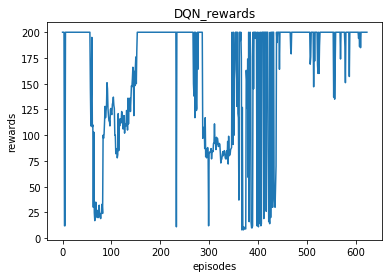

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('DQN_rewards')
ax.set_xlabel('episodes')
ax.set_ylabel('rewards')
episode_reward = np.array(y['episode_reward'])
ax.plot(episode_reward)
plt.savefig('CartPole_DQN_rewards')
plt.show()

In [56]:
len(episode_reward)

624

In [61]:
# 1) Avg. reward over the last 100 consecutive episodes
print('Avg. reward: ', np.mean(episode_reward[100:]))

Avg. reward:  163.116412214


In [62]:
# 2) How many episodes before you encounter 100 consecutive episodes
b4 = False
count = 0
max_continuous = 0
for idx, reward in enumerate(episode_reward > 150):
    count = count + 1 if b4 and reward else 0
    max_continuous = max(max_continuous, count)
    b4 = reward

In [63]:
max_continuous  # It doesn't reaches 100

80

### 3) any other informatoins
* The reward for every episodes
* DQN network summery

Are shown abeve.